In [1]:
import jieba
import matplotlib as plt
txt = open("hw1-dataset.txt", encoding="utf-8").read()  
#加載停用詞表  
stopwords = [line.strip() for line in open("hw1-stopset.txt",encoding="utf-8").readlines()]  
words  = jieba.lcut(txt)  
counts = {}  
for word in words:  
    #不在停用詞表中  
    if word not in stopwords:  
        #不統計字數爲一的詞  
        if len(word) == 1:  
            continue  
        else:  
            counts[word] = counts.get(word,0) + 1  
items = list(counts.items())  
items.sort(key=lambda x:x[1], reverse=True)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/k1/64vpfb157j3_w7pd2w8c61m80000gn/T/jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built successfully.


In [2]:
word=[]
count=[]
for i in range(100):
    x, y = items[i]
    word.append(x)
    count.append(y)
    index=range(100)
    print ("{:<10}{:>7}".format(x, y, linestyle=". -") )
plt.plot(index,count) #畫線
plt.xlabel('No.') # 設定x軸標題
plt.ylabel('Occurrences') # 設定y軸標題
plt.title('The frequency of words') # 設定圖表標題
plt.show()

八卦          79119
台灣          35851
肥宅          21771
真的          16890
一個          10535
中國          10230
一堆          10098
有人           9666
女生           8630
日本           8594
到底           8471
...          7547
很多           7488
喜歡           6782
朋友           6303
感覺           6147
美國           5358
不用           5230
正妹           4833
東西           4368
台北           4288
QQ           3990
時間           3965
妹妹           3812
世界           3792
沒人           3725
發現           3559
中國人          3554
國家           3554
不到           3494
工作           3483
男生           3323
好吃           3320
公司           3199
老婆           3157
女友           3146
老師           2943
大學           2937
邊緣           2807
南部           2744
好像           2712
遊戲           2690
第一           2640
手機           2595
垃圾           2587
一點           2587
只能           2536
別人           2533
才能           2533
10           2503
小孩           2435
還好           2394
電影           2378
新聞           2378
還要           2375
韓國        

AttributeError: module 'matplotlib' has no attribute 'plot'

## TF-IDF

In [3]:
import jieba
import jieba.analyse
content = open('hw1-dataset.txt', 'r', encoding='utf-8').read()
jieba.analyse.set_stop_words("hw1-stopset.txt")
tags = jieba.analyse.extract_tags(content, topK=100)
print(",".join(tags))

什麼,八卦,台灣,怎麼,肥宅,現在,不會,還是,是不是,一個,中國,這樣,怎樣,時候,一樣,真的,沒有,...,應該,可以,喜歡,因為,一堆,問題,感覺,哪個,女生,這麼,覺得,這種,美國,正妹,知道,其實,為何,還有,東西,比較,那麼,到底,有人,自己,QQ,時間,開始,這個,哪裡,不是,沒人,甚麼,出來,日本,那個,發現,中國人,國家,如果,不要,就是,他們,大家,朋友,很多,台北,已經,老師,大學,變成,邊緣,我們,結果,遊戲,不用,手機,一點,看到,多少,男生,別人,當然,10,女友,如何,還好,電影,新聞,還要,韓國,鄉民,起來,根本,XD,好吃,妹妹,的掛,不過,一直,..,ptt,最強


In [4]:
import jieba
import jieba.analyse
content = open('hw1-dataset.txt', 'r', encoding='utf-8').read()
jieba.analyse.set_stop_words("hw1-stopset.txt")
tags = jieba.analyse.extract_tags(content, topK=100, withWeight=True)
for tag in tags:
    print("tag:%s\t\t weight:%f"%(tag[0],tag[1]))

tag:什麼		 weight:0.194645
tag:八卦		 weight:0.194205
tag:台灣		 weight:0.120814
tag:怎麼		 weight:0.111867
tag:肥宅		 weight:0.073366
tag:現在		 weight:0.038009
tag:不會		 weight:0.036230
tag:還是		 weight:0.035684
tag:是不是		 weight:0.035576
tag:一個		 weight:0.035502
tag:中國		 weight:0.034474
tag:這樣		 weight:0.032590
tag:怎樣		 weight:0.029861
tag:時候		 weight:0.029675
tag:一樣		 weight:0.028691
tag:真的		 weight:0.026823
tag:沒有		 weight:0.026100
tag:...		 weight:0.025433
tag:應該		 weight:0.023599
tag:可以		 weight:0.022958
tag:喜歡		 weight:0.022855
tag:因為		 weight:0.022417
tag:一堆		 weight:0.021680
tag:問題		 weight:0.020816
tag:感覺		 weight:0.020715
tag:哪個		 weight:0.020644
tag:女生		 weight:0.020555
tag:這麼		 weight:0.019963
tag:覺得		 weight:0.018625
tag:這種		 weight:0.018245
tag:美國		 weight:0.018056
tag:正妹		 weight:0.016287
tag:知道		 weight:0.015811
tag:其實		 weight:0.015579
tag:為何		 weight:0.015043
tag:還有		 weight:0.014737
tag:東西		 weight:0.014720
tag:比較		 weight:0.014518
tag:那麼		 weight:0.014369
tag:到底		 weight:0.01385

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import jieba
import jieba.analyse
from optparse import OptionParser
txt = open("hw1-dataset.txt", encoding="utf-8").read()  
words  = jieba.lcut(txt)  
counts = {}  
tfidfj=jieba.analyse.extract_tags(txt, topK=100, withWeight=True, allowPOS=())
z=[]
for i in range(100):
    z.append(tfidfj[i][1])

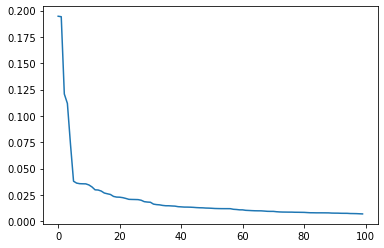

In [6]:
plt.plot(range(100),z)
plt.show() #顯示繪製的圖形